In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn

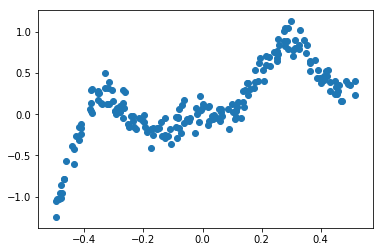

In [3]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

plt.scatter(x, y)

In [18]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

## Build Simple Network

In [21]:
n_input = 1
n_hidden = 2
n_output = 1
optimizer = tnn.Adam(learning_rate=0.03)


# l1 = tnn.NonLinearLayer(n_input, n_hidden, activation=tnn.Relu(), optimizer=optimizer)
# l2 = tnn.LinearLayer(n_hidden, n_output, optimizer=optimizer)

bias1 = tnn.BiasLayer(1, optimizer=optimizer)
drelu1 = tnn.DoubleRelu()
linear1 = tnn.LinearLayer(n_input*2, n_output,optimizer=optimizer)
net1 = tnn.AutoForm()
net1.collect_global_layers()

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(x_data)
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    dx = net1.backward(dy)
    net1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.4102263781185978

_______________________
epoch 100
Loss 0.04611944541368482

_______________________
epoch 200
Loss 0.03940547345911195

_______________________
epoch 300
Loss 0.03938833009243993

_______________________
epoch 400
Loss 0.03937210972086809

_______________________
epoch 500
Loss 0.039356112179955265

_______________________
epoch 600
Loss 0.039341111454139266

_______________________
epoch 700
Loss 0.039327614254334994

_______________________
epoch 800
Loss 0.03931590168356995

_______________________
epoch 900
Loss 0.03930607016530103

_______________________
epoch 1000
Loss 0.03929807366540482

_______________________
epoch 1100
Loss 0.039291765457695554

_______________________
epoch 1200
Loss 0.039286936799215084

_______________________
epoch 1300
Loss 0.03928400035875632

_______________________
epoch 1400
Loss 0.03928304400058176

_______________________
epoch 1500
Loss 0.03928240321973282

_______________________
epoch 16


_______________________
epoch 13400
Loss 0.039286705818997986

_______________________
epoch 13500
Loss 0.03928670579486676

_______________________
epoch 13600
Loss 0.03928670577264945

_______________________
epoch 13700
Loss 0.039286705752212575

_______________________
epoch 13800
Loss 0.03928670573342937

_______________________
epoch 13900
Loss 0.039286705716179766

_______________________
epoch 14000
Loss 0.039286705700350484

_______________________
epoch 14100
Loss 0.03928670568583488

_______________________
epoch 14200
Loss 0.0392867056725329

_______________________
epoch 14300
Loss 0.03928670566035077

_______________________
epoch 14400
Loss 0.03928670564920095

_______________________
epoch 14500
Loss 0.03928670563900174

_______________________
epoch 14600
Loss 0.03928670562967712

_______________________
epoch 14700
Loss 0.03928670562115644

_______________________
epoch 14800
Loss 0.03928670561337414

_______________________
epoch 14900
Loss 0.039286705606269484

___

TclError: invalid command name "pyimage258"

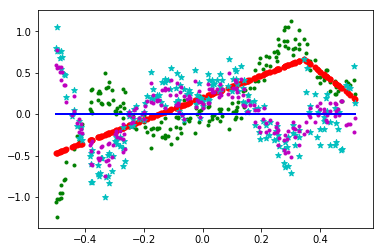

In [22]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)